# Imports

In [79]:
import pandas                 as pd
import numpy                  as np
import plotly.express         as px
import seaborn                as sns
import matplotlib.pyplot      as plt

from IPython.core.display     import HTML
from IPython.display          import Image


## Help Functions

In [80]:
# adjust jupyter notebook viz
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    # sns.set()
    
    
jupyter_settings()


Populating the interactive namespace from numpy and matplotlib


# Load and Summary Data

In [3]:
df  = pd.read_csv('ChurnTelecom.csv')

In [7]:
df.Churn.value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

# EDA

In [11]:
# Group telco by 'Churn' and compute the mean

print(df.groupby(['Churn']).mean())
print(df.groupby(['Churn']).std())

#  conclusion :

       Account_Length  Vmail_Message    Day_Mins    Eve_Mins  Night_Mins  Intl_Mins  CustServ_Calls   Day_Calls  Day_Charge   Eve_Calls  Eve_Charge  Night_Calls  Night_Charge  Intl_Calls  Intl_Charge   Area_Code
Churn                                                                                                                                                                                                              
no         100.793684       8.604561  175.175754  199.043298  200.133193  10.158877        1.449825  100.283158   29.780421  100.038596   16.918909   100.058246      9.006074    4.532982     2.743404  437.074737
yes        102.664596       5.115942  206.914079  212.410145  205.231677  10.700000        2.229814  101.335404   35.175921  100.561077   18.054969   100.399586      9.235528    4.163561     2.889545  437.817805


In [ ]:
# Count the number of churners and non-churners by State
churn_state = df.groupby('State')['Churn'].value_counts()
churn_state

#  conclusion :

In [ ]:
fig = px.scatter(df, x = df.Account_Length, y=df.Day_Charge)
fig.show()

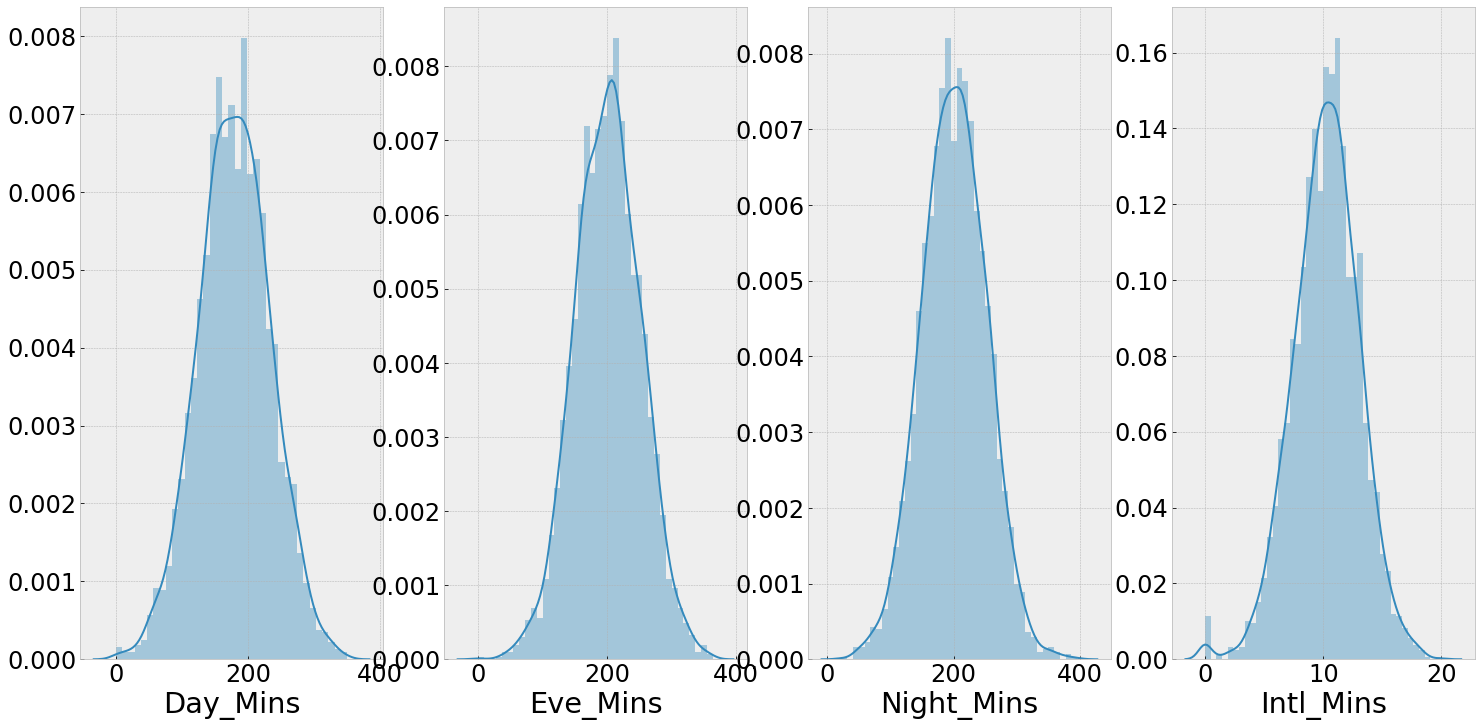

In [81]:

plt.subplot(1,4,1)
sns.distplot(df['Day_Mins'])

plt.subplot(1,4,2)
sns.distplot(df['Eve_Mins'])

plt.subplot(1,4,3)
sns.distplot(df['Night_Mins'])

plt.subplot(1,4,4)
sns.distplot(df['Intl_Mins'])
# 
#conclusion

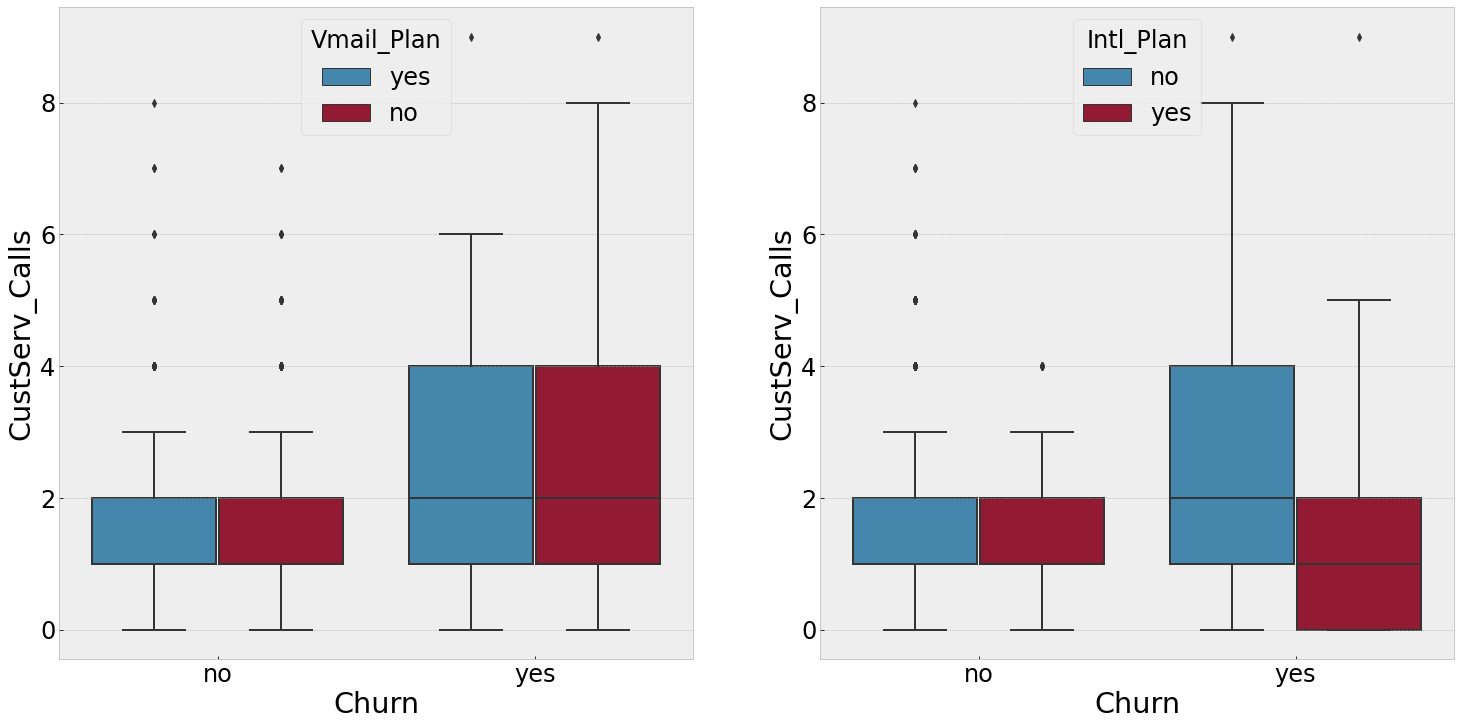

In [46]:
# # 
# # Create the box plot

plt.subplot(1,2,1)
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            # sym = '', # cancel outlier
            hue = "Vmail_Plan",
            data = df)

plt.subplot(1,2,2)
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            # sym = '', # cancel outlier
            hue = "Intl_Plan",
            data = df)


# conclusions


### conclusion :

# Pre-Processing

In [73]:
df1 = df.copy()

## Encoding vars

In [75]:
# Use labelEncoder or replace

# or replace :

df1['Intl_Plan'] = df1['Intl_Plan'].replace({'no': 0 , 'yes': 1 }) 

# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
df1['Vmail_Plan'] = df1['Vmail_Plan'].replace({'no': 0, 'yes':1})

# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
df1['Churn'] = df1['Churn'].replace({'no': 0, 'yes':1})


In [83]:
# Import pandas

# Perform one hot encoding on 'State'
telco_state = pd.get_dummies(df1.State)


In [85]:
print(telco_state.head())

   AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  GA  HI  IA  ID  IL  IN  KS  KY  LA  MA  MD  ME  MI  MN  MO  MS  MT  NC  ND  NE  NH  NJ  NM  NV  NY  OH  OK  OR  PA  RI  SC  SD  TN  TX  UT  VA  VT  WA  WI  WV  WY
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   

In [76]:
df1.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn               int64
Intl_Plan           int64
Vmail_Plan          int64
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

# Re-Scaling data

In [86]:
df2 = df1.copy()

In [88]:
# Use standartization
from sklearn.preprocessing import StandardScaler

# Scale telco
# telco_scaled = StandardScaler().fit_transform(df2)
